### Задание 3 (бонусное)

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы grouplens.org.../movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

In [217]:
ratings = pd.read_csv('ratings.csv')
movies = pd.read_csv('movies.csv')

In [218]:
# Создаем список годов указанного периода
years = list(range(1950,2011)) 

In [219]:
# Соединяем два датафрейма 
joined  = movies.merge(ratings, on='movieId', how='left')

In [261]:
def production_year(title):
    """Возвращает год выпуска из наименования фильма в виде integer - сделал так для сортировки по году """
    for i in years:
        if str(i) in title:
            return int(i)
    return int(2021) # все фильмы без года и с годом вне нужного диапазона, убрал в 2021, чтобы на графике было от 1950

In [262]:
#Создаем новый столбец с результатом применения функции к каждому значению столба title
joined['year'] = joined['title'].apply(production_year)

In [270]:
# Проверка на выборочных строках
joined.sample(frac=0.001)

,movieId,title,genres,userId,rating,timestamp,year
9553,318,"Shawshank Redemption, The (1994)",Crime|Drama,67.0,5.0,8.547133e+08,1994
78007,6333,X2: X-Men United (2003),Action|Adventure|Sci-Fi|Thriller,22.0,4.5,1.131663e+09,2003
64205,3614,Honeymoon in Vegas (1992),Comedy|Romance,381.0,3.0,1.018682e+09,1992
9528,318,"Shawshank Redemption, The (1994)",Crime|Drama,3.0,5.0,1.298862e+09,1994
2715,50,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,261.0,5.0,1.101666e+09,1995
...,...,...,...,...,...,...,...
87322,39183,Brokeback Mountain (2005),Drama|Romance,461.0,3.5,1.150092e+09,2005
79770,6863,School of Rock (2003),Comedy|Musical,580.0,3.0,1.218137e+09,2003
26791,1097,E.T. the Extra-Terrestrial (1982),Children|Drama|Sci-Fi,23.0,5.0,1.148672e+09,1982
49561,2391,"Simple Plan, A (1998)",Crime|Drama|Thriller,388.0,4.0,9.465227e+08,1998


In [278]:
# Сохраняем в res сгруппированный DataFrame по годам по убываниб значений Raing.
res = joined.groupby(['year']).mean().sort_values(by='rating', ascending=False).head(50)
res.head()

,movieId,userId,rating,timestamp
year,,,,
1957,3001.949527,360.933544,4.014241,1.083707e+09
1972,3983.538976,359.694878,4.011136,1.122759e+09
1952,4462.532468,346.394737,4.000000,1.090512e+09
1954,2867.661850,358.228324,3.994220,1.070591e+09
1951,2605.588477,347.106996,3.983539,1.052714e+09


#### Но это не наглядно и не дает ответа на вопрос : Понижается ли средний рейтинг с увеличением года производства ?  
Поэтому сделал так ) 

In [279]:
# Сохраняем в res сгруппированный DataFrame по годам по возростанию.
res = joined.groupby(['year']).mean().sort_values(by='year', ascending=True).head(50)

In [280]:
res.head()

,movieId,userId,rating,timestamp
year,,,,
1950,3503.427966,355.720339,3.915254,1.090648e+09
1951,2605.588477,347.106996,3.983539,1.052714e+09
1952,4462.532468,346.394737,4.000000,1.090512e+09
1953,4047.401826,357.252294,3.754587,1.070596e+09
1954,2867.661850,358.228324,3.994220,1.070591e+09


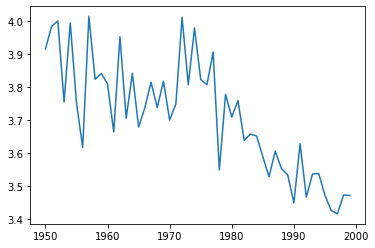

In [288]:
# Выводим график и все становится понятно! 
plt.plot(res.index, res['rating'])
plt.show()